In [6]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [19]:
# df = pd.read_csv("../hackathon_womens.csv")
# df = pd.read_csv("../hackathon_scouting.csv")
df = pd.read_csv("../hackathon_nwhl.csv")
df.head()

,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2
0,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,Boston Pride,Jillian Dempsey,Faceoff Win,100,43,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:58,5,5,0,0,Boston Pride,McKenna Brand,Puck Recovery,107,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:57,5,5,0,0,Boston Pride,McKenna Brand,Zone Entry,125,28,Carried,NaN,NaN,NaN,Maddie Rowe,NaN,NaN
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,McKenna Brand,Shot,131,28,Snapshot,On Net,t,f,NaN,NaN,NaN
4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,Boston Pride,Tereza Vanisova,Faceoff Win,169,21,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN


In [20]:
df[df['Event'] == 'Goal'].head()

,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2
387,2021-01-23,Minnesota Whitecaps,Boston Pride,1,6:42,5,5,0,0,Boston Pride,Christina Putigna,Goal,175,44,Snapshot,On Net,f,f,NaN,NaN,NaN
423,2021-01-23,Minnesota Whitecaps,Boston Pride,1,5:40,5,5,0,1,Minnesota Whitecaps,Jonna Curtis,Goal,180,39,Snapshot,On Net,f,f,NaN,NaN,NaN
879,2021-01-23,Minnesota Whitecaps,Boston Pride,2,8:02,5,5,1,1,Minnesota Whitecaps,Winny Brodt-Brown,Goal,188,55,Snapshot,On Net,t,f,NaN,NaN,NaN
2382,2021-01-23,Buffalo Beauts,Connecticut Whale,2,15:54,5,5,0,0,Connecticut Whale,Kayla Friesen,Goal,144,15,Snapshot,On Net,t,f,NaN,NaN,NaN
3052,2021-01-23,Buffalo Beauts,Connecticut Whale,3,14:32,5,4,0,1,Buffalo Beauts,Kristin Lewicki,Goal,168,28,Wristshot,On Net,t,f,NaN,NaN,NaN


In [21]:
teams = set(df['Home Team']) | set(df['Away Team'])
teams

{'Boston Pride',
 'Buffalo Beauts',
 'Connecticut Whale',
 'Metropolitan Riveters',
 'Minnesota Whitecaps',
 'Toronto Six'}

In [36]:
passes = df[(df['Event'] == 'Play')]
failed_passes = df[(df['Event'] == 'Incomplete Play')]
passes

,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2
8,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:47,5,5,0,0,Minnesota Whitecaps,Stephanie Anderson,Play,157,0,Indirect,NaN,NaN,NaN,Meghan Lorence,198.0,38.0
9,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:43,5,5,0,0,Minnesota Whitecaps,Meghan Lorence,Play,193,20,Direct,NaN,NaN,NaN,Haley Mack,196.0,33.0
11,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:40,5,5,0,0,Boston Pride,Mallory Souliotis,Play,3,49,Direct,NaN,NaN,NaN,Taylor Wenczkowski,37.0,70.0
17,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:28,5,5,0,0,Boston Pride,Mallory Souliotis,Play,12,33,Direct,NaN,NaN,NaN,Taylor Wenczkowski,61.0,85.0
22,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:17,5,5,0,0,Boston Pride,Mallory Souliotis,Play,25,3,Indirect,NaN,NaN,NaN,Samantha Davis,57.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26871,2021-02-01,Buffalo Beauts,Boston Pride,3,0:34,4,5,1,7,Boston Pride,Samantha Davis,Play,179,79,Indirect,NaN,NaN,NaN,Lexie Laing,197.0,57.0
26874,2021-02-01,Buffalo Beauts,Boston Pride,3,0:23,4,5,1,7,Boston Pride,Samantha Davis,Play,195,47,Indirect,NaN,NaN,NaN,Taylor Turnquist,138.0,83.0
26875,2021-02-01,Buffalo Beauts,Boston Pride,3,0:09,4,5,1,7,Boston Pride,Taylor Turnquist,Play,159,49,Direct,NaN,NaN,NaN,Samantha Davis,171.0,61.0
26878,2021-02-01,Buffalo Beauts,Boston Pride,3,0:06,4,5,1,7,Buffalo Beauts,Megan Delay,Play,8,61,Indirect,NaN,NaN,NaN,Cassidy MacPherson,29.0,82.0


In [65]:
import networkx as nx


passing_network = dict()
for team in teams:
    print(team)
    team_df = passes[passes['Team'] == team]
    
    # Be careful.  Not all events have players from the same team
    team_players = set(team_df['Player']) | set(team_df['Player 2'])
    team_players
    
    DG = nx.DiGraph()
    
    for i, pass_ in team_df.iterrows():
        
        DG.add_node(pass_['Player 2'])
        DG.add_node(pass_['Player'])
        if DG.has_edge(pass_['Player 2'], pass_['Player']):
            DG[pass_['Player 2']][pass_['Player']]['weight'] += 1
        else:
            DG.add_edge(pass_['Player 2'], pass_['Player'], weight= 1)
        
    break
    
DG.edges.data()
    
#     passing_network[team] = team_players
# passing_network

Metropolitan Riveters


OutEdgeDataView([('Sammy Kolowrat', 'Sonjia Shelly', {'weight': 3}), ('Sammy Kolowrat', 'Brooke Avery', {'weight': 3}), ('Sammy Kolowrat', 'Kiira Dosdall', {'weight': 26}), ('Sammy Kolowrat', 'Theresa Knutson', {'weight': 1}), ('Sammy Kolowrat', 'Kelly Babstock', {'weight': 1}), ('Sammy Kolowrat', 'Kendall Cornine', {'weight': 1}), ('Sammy Kolowrat', 'Tera Hofmann', {'weight': 1}), ('Sammy Kolowrat', 'Madison Packer', {'weight': 5}), ('Sammy Kolowrat', 'Rebecca Russo', {'weight': 2}), ('Sammy Kolowrat', 'Paige Voight', {'weight': 1}), ('Sammy Kolowrat', 'Kate Leary', {'weight': 2}), ('Sammy Kolowrat', 'Jayne Lewis', {'weight': 1}), ('Sammy Kolowrat', 'Rebecca Morse', {'weight': 1}), ('Kiira Dosdall', 'Sammy Kolowrat', {'weight': 12}), ('Kiira Dosdall', 'Paige Voight', {'weight': 2}), ('Kiira Dosdall', 'Rebecca Russo', {'weight': 12}), ('Kiira Dosdall', 'Madison Packer', {'weight': 17}), ('Kiira Dosdall', 'Brooke Avery', {'weight': 3}), ('Kiira Dosdall', 'Cailey Hutchison', {'weight': 3

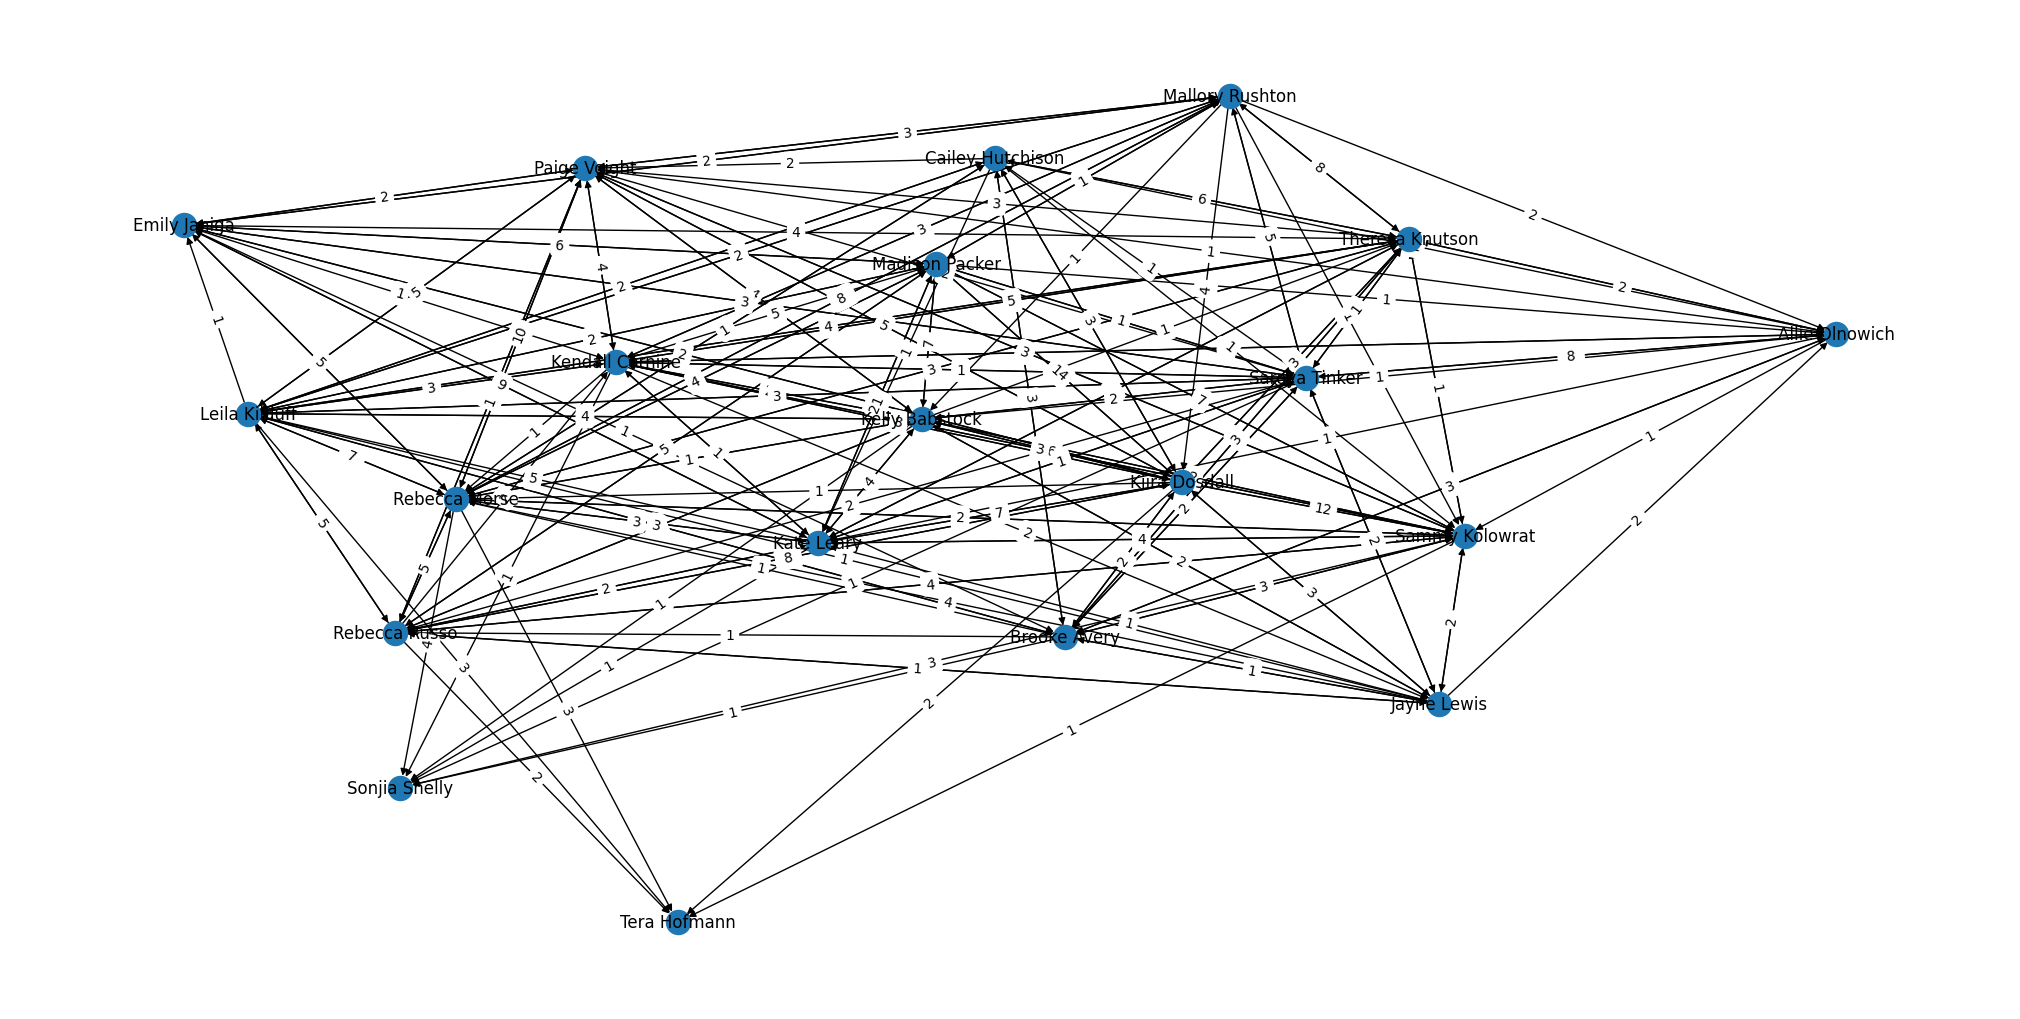

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10), dpi=100)
pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(DG, pos)
labels = nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_labels(DG, pos)
nx.draw_networkx_edge_labels(DG, pos, edge_labels=labels)
plt.show()
# nx.draw_networkx_edge_labels(DG, with_labels=True, font_weight='bold')